In [19]:
import pandas as pd

dataset = 'amz-toys' # toys
source_path = f'raw_data/P5/{dataset}/reviews.pickle'

# text = summary + \n + reviewText (queda una mica lleig en el csv ngl)
# Amb el naive white space splitter no sabrà ni tant sols agafar bé el summary i el reviewText...

# Crec que si no faig servir simplement les sentences curtes del PETER i uso com l'Alejandro les reviews o summaries,
# crec que com a mínim mínim s'hauria de passar tot a minúscula per no perdre inútilment paraules per res

df = pd.DataFrame(pd.read_pickle(source_path))

df.head(1)

,user,item,rating,text,sentence
0,A1VXOAVRGKGEAK,0439893577,5,Magnetic board\nI like the item pricing. My gr...,NaN


In [28]:
df[(df['user']=='A3BTN14HIZET6Z') & (df['item']=='7806397051')].iloc[0]['sentence']

[('silicone', 'based', 'I also use a silicone based primer', 1),
 ('product', 'nice', 'The product is nicely pigmented', 1),
 ('skin', 'normal', "I have normal to dry skin as I'm 59 years", 1),
 ('skin', 'dry', "I have normal to dry skin as I'm 59 years", 1)]

In [20]:
df2 = df.explode('sentence')

df2 = df2.dropna(subset=['sentence']).rename(columns={'sentence': 'quadruplet'})

print(df2.shape)

cols = ['feature', 'opinion', 'sentence', 'sentiment']

for i, col in enumerate(cols):
    df2[col] = df2['quadruplet'].str[i]

df2 = df2.drop(columns=['quadruplet', 'text'])

df2.head()

(195296, 5)


,user,item,rating,feature,opinion,sentence,sentiment
8,AFGGC7SIV964O,0439893577,4,product,good,good product,1
8,AFGGC7SIV964O,0439893577,4,product,good,This is good product to have with unlimited po...,1
8,AFGGC7SIV964O,0439893577,4,size,nice,It's a nice size & works very well for our needs,1
10,A1TNIN1HQIW2L6,0439893577,5,storage,nice,Holds the letters great and folds together nic...,1
11,A5I03TZD4J96V,0439893577,5,size,great,great size to travel with also,1


In [13]:
df2[67:100] # la feature pot ser més d'una word!!

,user,item,rating,feature,opinion,sentence,sentiment
52,A1S8KORSO7AL10,B00004TMFE,3,hair feel,thicker,This stuff makes your hair feel thicker after ...,1
52,A1S8KORSO7AL10,B00004TMFE,3,fragrance,light,you'll just have a light fragrance of some ind...,1
52,A1S8KORSO7AL10,B00004TMFE,3,dish soap,lemon,but it kinda smells like lemony dish soap or l...,-1
52,A1S8KORSO7AL10,B00004TMFE,3,scent,strong,It is not strong scented,-1
53,A2X0X13NTPOZN1,B00004TMFE,4,texture,good,It has a good texture and consistency and does...,1
53,A2X0X13NTPOZN1,B00004TMFE,4,conditioner,good,My four stars is based solely on the fact that...,1
53,A2X0X13NTPOZN1,B00004TMFE,4,conditioner,good,but it's a good conditioner,1
54,A66XG9X8S7IH,B00004TMFE,4,hair feeling,clean,I think it leaves my hair feeling fresh and clean,1
54,A66XG9X8S7IH,B00004TMFE,4,hair feeling,fresh,I think it leaves my hair feeling fresh and clean,1
54,A66XG9X8S7IH,B00004TMFE,4,finish,nice,This is a nice finishing touch to your bath,1


In [16]:
import os

df2['text'] = df2['sentence']

save_dir = f'data/{dataset}-sentence'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

df3 = df2[['user', 'item', 'rating', 'text']]

df3.to_csv(save_dir + '/reviews.csv', index=False)

df3.head(1)

,user,item,rating,text
2,A3G6XNM240RMWA,7806397051,4,it has great coverage and a wide variety of uses


In [17]:
df2['text'] = df2['feature'] + ' ' + df2['opinion'] + ' ' + df2['sentence']

save_dir = f'data/{dataset}-feat_op_sent'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

df4 = df2[['user', 'item', 'rating', 'text']]

df4.to_csv(save_dir + '/reviews.csv', index=False)

df4.head(1)

,user,item,rating,text
2,A3G6XNM240RMWA,7806397051,4,coverage great it has great coverage and a wid...


In [18]:
df2['text'] = df2['feature'] + ' ' + df2['sentence']

save_dir = f'data/{dataset}-feat_sent'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

df5 = df2[['user', 'item', 'rating', 'text']]

df5.to_csv(save_dir + '/reviews.csv', index=False)

df5.head(1)

,user,item,rating,text
2,A3G6XNM240RMWA,7806397051,4,coverage it has great coverage and a wide vari...


In [3]:
#target_path = f'data/{dataset}/reviews.csv'

df = df[['user', 'item', 'rating', 'text']] # drop the sentence column (the sentries toolkit)
#df.to_csv(target_path, index=False)

df.head(1)

,user,item,rating,text
0,A1YJEY40YUW4SE,7806397051,1,Don't waste your money\nVery oily and creamy. ...


In [9]:
import pickle

with open(f'../raw_data/P5/{dataset}/review_splits.pkl', 'rb') as f:
    reviews = pickle.load(f)

In [13]:
sorted(reviews['test_indices'])

[31,
 34,
 39,
 47,
 54,
 59,
 69,
 70,
 86,
 95,
 113,
 116,
 118,
 126,
 127,
 143,
 146,
 149,
 154,
 164,
 172,
 178,
 190,
 196,
 215,
 238,
 239,
 241,
 249,
 269,
 280,
 319,
 325,
 334,
 337,
 345,
 347,
 351,
 362,
 388,
 409,
 428,
 432,
 438,
 497,
 511,
 516,
 520,
 528,
 558,
 561,
 565,
 577,
 600,
 606,
 608,
 610,
 619,
 637,
 642,
 649,
 651,
 653,
 663,
 677,
 688,
 693,
 695,
 722,
 751,
 760,
 781,
 788,
 803,
 804,
 810,
 822,
 848,
 855,
 865,
 868,
 870,
 872,
 883,
 890,
 904,
 915,
 918,
 922,
 944,
 947,
 986,
 988,
 1009,
 1011,
 1028,
 1031,
 1040,
 1041,
 1048,
 1055,
 1058,
 1064,
 1072,
 1121,
 1127,
 1130,
 1132,
 1145,
 1147,
 1184,
 1192,
 1197,
 1201,
 1202,
 1204,
 1211,
 1229,
 1233,
 1255,
 1260,
 1272,
 1273,
 1287,
 1296,
 1364,
 1375,
 1385,
 1386,
 1404,
 1408,
 1413,
 1427,
 1431,
 1435,
 1440,
 1444,
 1447,
 1450,
 1456,
 1468,
 1470,
 1480,
 1482,
 1517,
 1519,
 1524,
 1530,
 1537,
 1539,
 1554,
 1559,
 1564,
 1575,
 1578,
 1580,
 1582,
 158

## Data origin check

In [5]:
# From P5 raw_data, executing Lei Li's Sentires guide and keeping all the output of the toolkit,
# i.e. the sentence column with a list of tuples (feature, opinion, sentence, sentiment')

import pandas as pd

dataset = 'amz-beauty'
source_path = f'../raw_data/P5/{dataset}/reviews.pickle'

df1 = pd.DataFrame(pd.read_pickle(source_path))

df1.head(1)

,user,item,rating,text,sentence
0,A1YJEY40YUW4SE,7806397051,1,Don't waste your money\nVery oily and creamy. ...,NaN


In [5]:
df1['sentence'].str[0]

0                                                       NaN
1                                                       NaN
2         (coverage, great, it has great coverage and a ...
3                                                       NaN
4         (coverage, great, I think it does great covera...
                                ...                        
198497                       (dab, little, A little dab, 1)
198498    (shea butter, raw, Pure organic raw shea butte...
198499    (product, natural, Shea butter is a natural pr...
198500    (elbows, dry, I have very dry elbows and knees...
198501                                                  NaN
Name: sentence, Length: 198502, dtype: object

In [1]:
# The original files from Julian Mc Auley 5-core 2015 Amazon product & reviews dataset

import pandas as pd
import gzip
import json

dataset = 'amz-beauty'
filename = 'Beauty'
source_path = f'raw_data/McAuley14/{dataset}/reviews_{filename}_5.json.gz'

with gzip.open(source_path, 'rb') as f:
    data = [json.loads(line) for line in f]

df2 = pd.DataFrame(data)

df2.head(1)

FileNotFoundError: [Errno 2] No such file or directory: 'raw_data/McAuley14/amz-beauty/reviews_Beauty_5.json.gz'

In [7]:
df = pd.merge(df1, df2, left_on=['user', 'item'], right_on=['reviewerID', 'asin']).drop(columns=['reviewerID', 'asin'])

print(df.shape[0], 'reivews')
assert df.shape[0] == df1.shape[0] == df2.shape[0] # Oh això funciona així directament comparar 3 coses

# The text is exactly this:
(df['text'] == df['summary'] + "\n" + df['reviewText']).all()

df.head(1)

198502 reivews


,user,item,rating,text,sentence,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1YJEY40YUW4SE,7806397051,1,Don't waste your money\nVery oily and creamy. ...,NaN,Andrea,"[3, 4]",Very oily and creamy. Not at all what I expect...,1.0,Don't waste your money,1391040000,"01 30, 2014"


<Axes: >

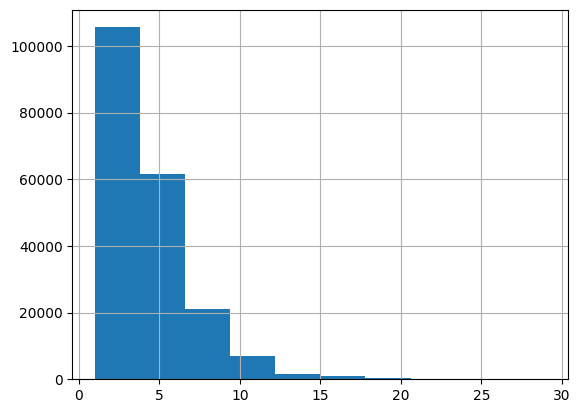

In [8]:
df['summary'].str.split().str.len().hist() # les summaries tendeixen a ser curtes

<Axes: >

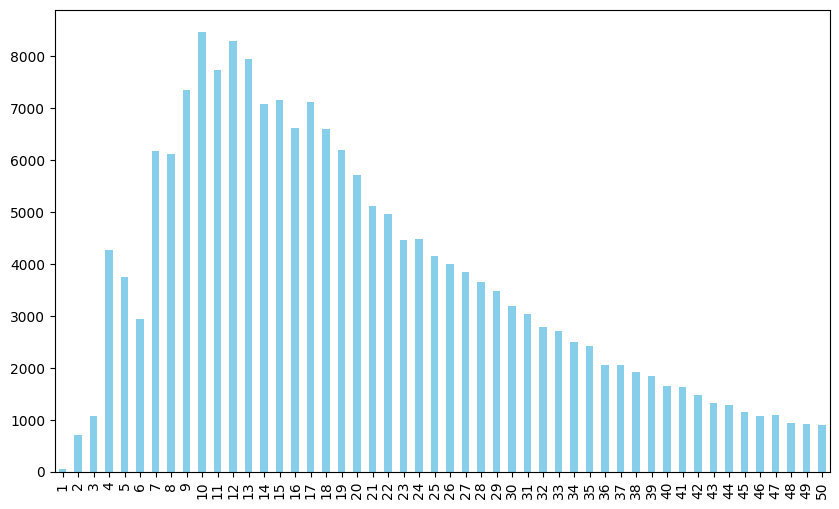

In [14]:
df['summary'].str.len().value_counts().sort_index()[:50].plot(kind='bar', figsize=(10, 6), color='skyblue')

<Axes: ylabel='Frequency'>

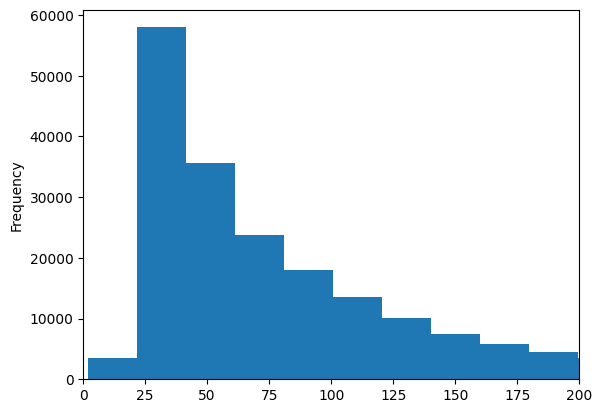

In [10]:
df['text'].str.split().str.len().plot(kind='hist', bins=200, xlim=(0, 200)) # juntat la review pot ser molt llarg

<Axes: >

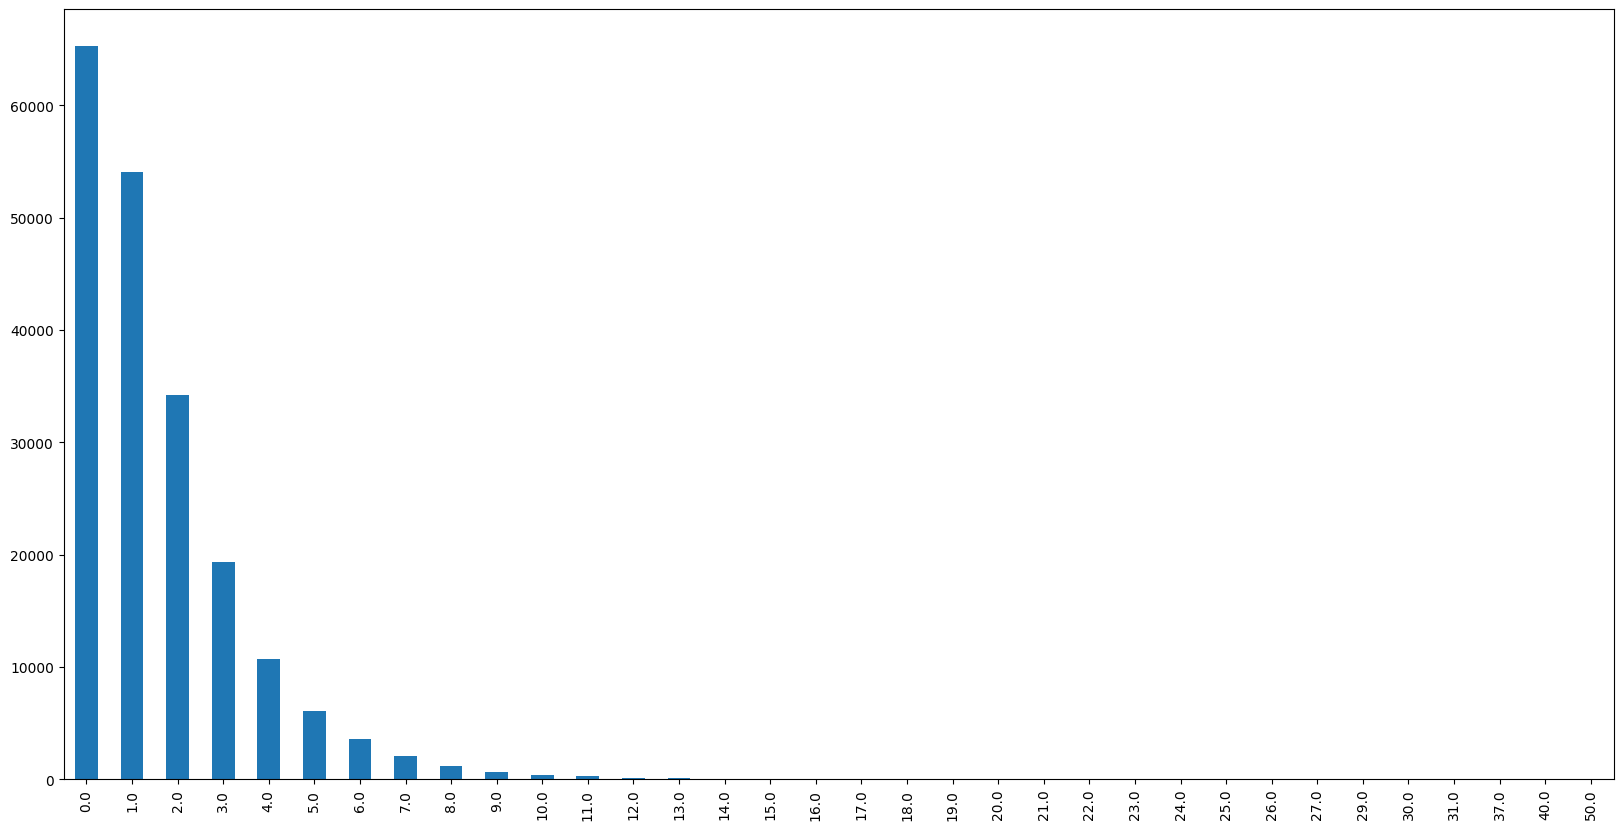

In [11]:
# He descartat però de moment les sentenes, pq em complica el codi de PETER sense aportar gaire
# i a més costa moltíssim de generar per noves dades, i.e. molt més cost del que m'aporta
df['sentence'].str.len().fillna(0).value_counts().sort_index().plot(kind='bar', figsize=(20, 10))

<Axes: ylabel='overall'>

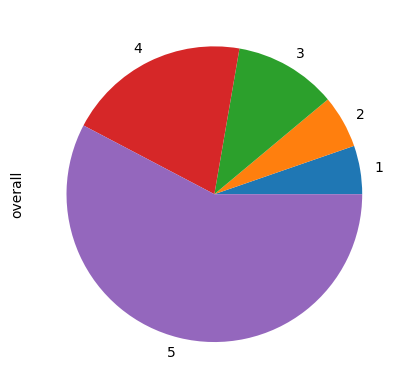

In [13]:
df['overall'].value_counts().sort_index().plot(kind='pie') # les reviews tendeixen a ser bones